<a href="https://colab.research.google.com/github/Laeti-dev/P7-Sentiments_analysis/blob/master/notebooks/P7_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install wordcloud

In [14]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Introduction

This notebook aims to get the data from an open source and proceed to an exploratory analysis of the data. In the exploration we will :
- understand the different features
- understand the target distribution (sentiment classes)
- evaluate the relation between time and target
- evaluate the reltion between author and target
- evaluate the relation between flags and target
- get the most frequent words for each targeted tweets
- understand tweets pattern for each target

# Load data

Load the tweets data from the CSV file into a pandas DataFrame.


**About this file**:
This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- *target*: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- *ids*: The id of the tweet ( 2087)
- *date*: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- *flag*: The query (lyx). If there is no query, then this value is NO_QUERY.
- *user*: the user that tweeted (robotickilldozr)
- *text*: the text of the tweet (Lyx is cool)



In [1]:
path = '/content/drive/MyDrive/OC/Projets/P7/data/training.1600000.processed.noemoticon.csv'
# Load the data from the CSV file into a pandas DataFrame
df = pd.read_csv(path,
                  header=None,
                  names=["target", "ids", "date", "flag", "user", "text"],
                  usecols=["target", "ids", "date", "user", "text"],  # remove flag column
                  parse_dates=["date"],
                  encoding="utf-8",
                  encoding_errors="replace",)

# Display the first few rows of the DataFrame and its info
display(df.head())
display(df.info())

/tmp/ipython-input-1-1691829743.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv(path,


,target,ids,date,user,text
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    1600000 non-null  datetime64[ns]
 3   user    1600000 non-null  object        
 4   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 61.0+ MB


None

The data set has a the shape (1600000,5) without any obvious missing values

# Genaralities

First, it is important to understand our data and more specifically our target.

What are the possible values?

is it equally distributed or do we need to proceed on some balancing method ?

It is also important to check that all our target are associated with clean, unique features.

## Missing values and duplicates

In [2]:
# Display columns and their data types
print(f'columns: {df.columns}')
print(df.dtypes)

# Check for missing values
print(f'missing values: {df.isnull().sum()}')

# check for duplicates
print(f'duplicates: {df.duplicated().sum()}')

columns: Index(['target', 'ids', 'date', 'user', 'text'], dtype='object')
target             int64
ids                int64
date      datetime64[ns]
user              object
text              object
dtype: object
missing values: target    0
ids       0
date      0
user      0
text      0
dtype: int64
duplicates: 0


## Target

In [3]:
# possible values
print(f'possible values: {df["target"].unique()}')

original_df = df.copy()

# Convert the target variable to a 0-1 scale (0: Negative, 1: Positive)
df['target'] = df['target'].replace({0: 0, 4: 1})
print(f'Scaled possible values: {df["target"].unique()}')

possible values: [0 4]
Scaled possible values: [0 1]


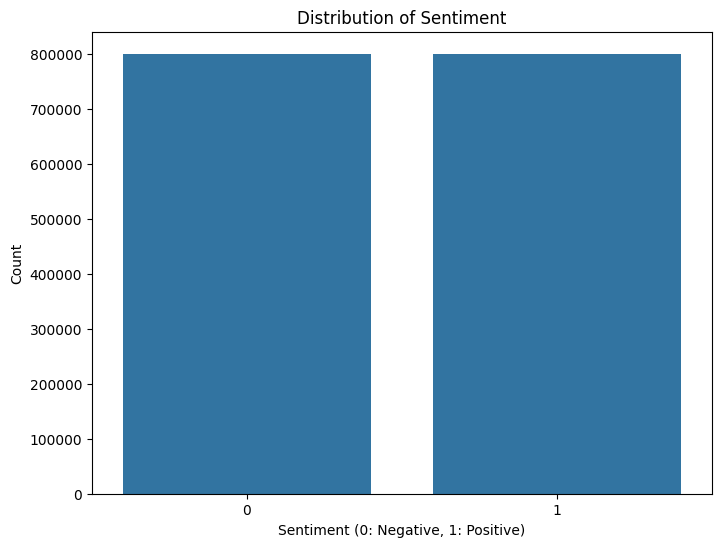

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

## Target over time

In [4]:
# split the date column into year, month and day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.dayofweek

print(f'Tweets are going from {df["date"].min()} to {df["date"].max()}')
display(df.head())

Tweets are going from 2009-04-06 22:19:45 to 2009-06-25 10:28:31


,target,ids,date,user,text,year,month,day,hour,weekday
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22,0
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22,0
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22,0
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22,0
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22,0


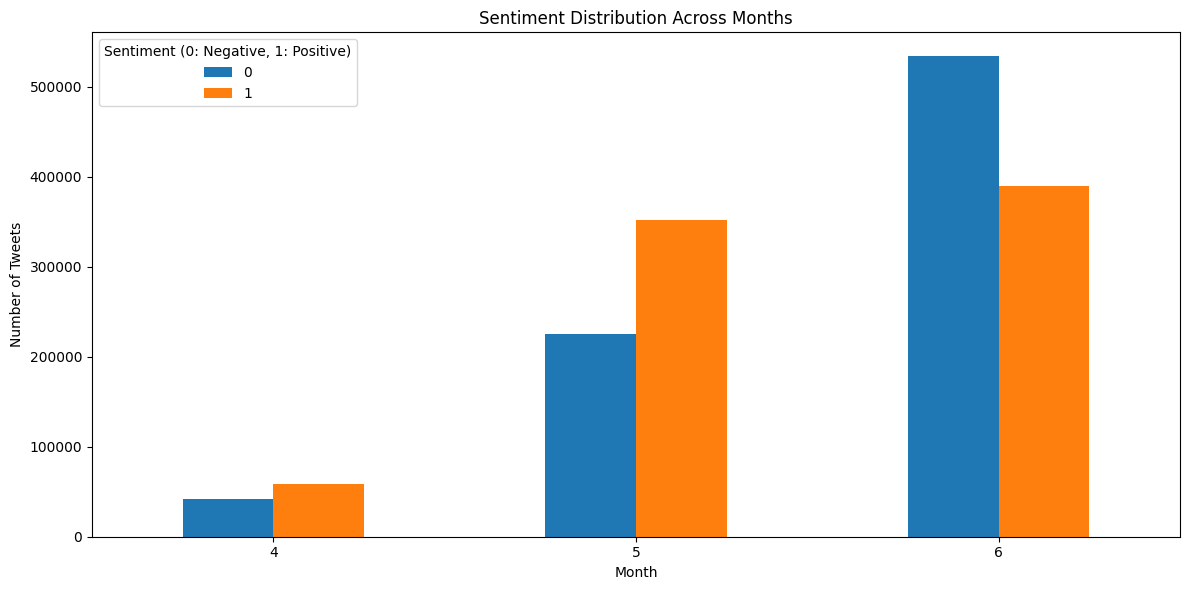

In [7]:
# Group by month and target, then count the occurrences
target_by_month = df.groupby(['month', 'target']).size().unstack(fill_value=0)

# Plot the distribution of sentiments over the months
plt.figure(figsize=(12, 6))
target_by_month.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Sentiment Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

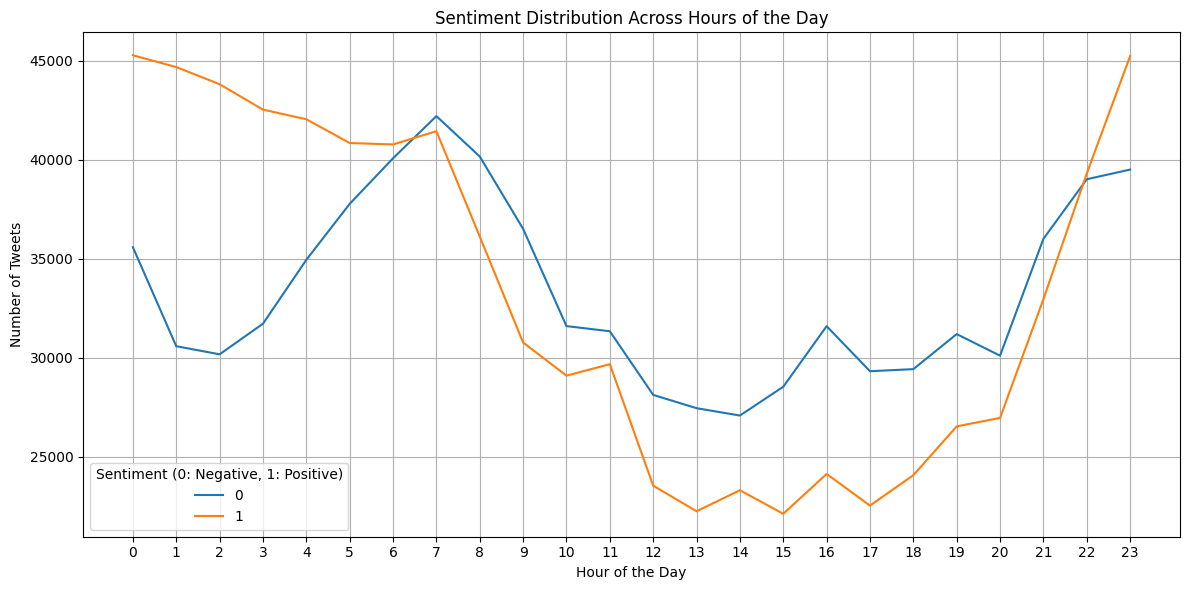

In [8]:
# Group by hour and target, then count the occurrences
target_by_hour = df.groupby(['hour', 'target']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across hours of the day
plt.figure(figsize=(12, 6))
target_by_hour.plot(kind='line', stacked=False, ax=plt.gca())
plt.title('Sentiment Distribution Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(range(24))
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.grid(True)
plt.tight_layout()
plt.show()


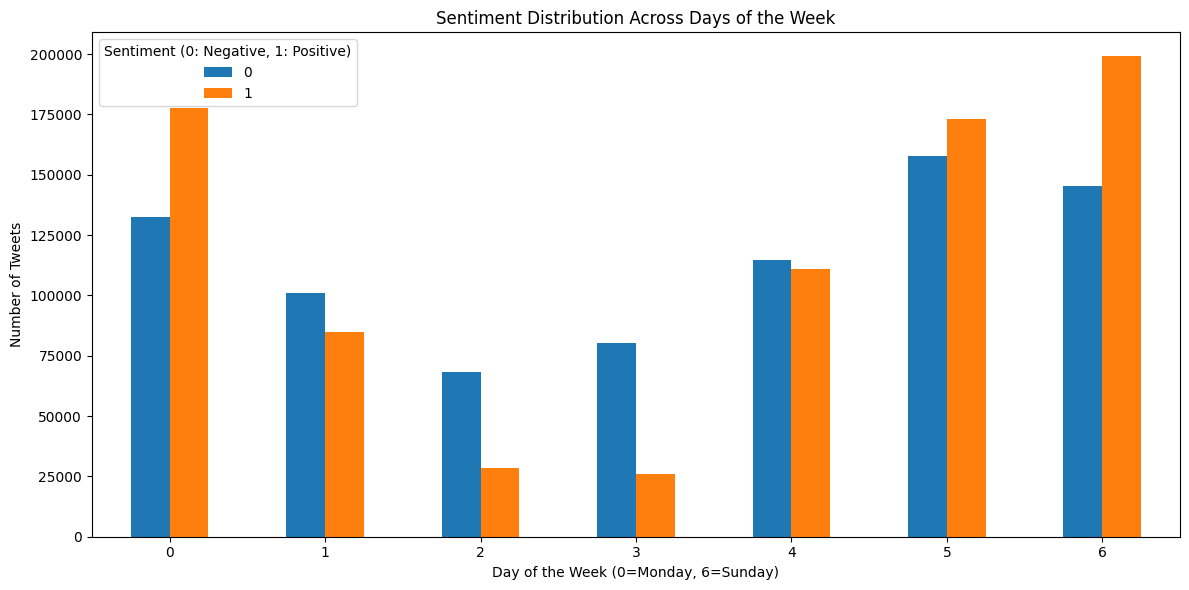

In [9]:
# Group by weekday and target, then count the occurrences
target_by_weekday = df.groupby(['weekday', 'target']).size().unstack(fill_value=0)

# Plot the distribution of sentiments over the days of the week
plt.figure(figsize=(12, 6))
target_by_weekday.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Sentiment Distribution Across Days of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

# Tweets analysis

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

import re

eng_stopwords = nltk.corpus.stopwords.words('english')
# Simple clean and text tokenizer
def preprocess_text(text):
    # lower case and get rid off special characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenizer
    tokens = text.split()
    # delete stopwords
    tokens = [word for word in tokens if word not in eng_stopwords and len(word) > 1]
    return tokens


# Apply the cleaning function to the 'text' column
df['tokens'] = df['text'].apply(preprocess_text)

# Display the original and cleaned text for comparison
display(df[['text', 'tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,tokens
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[switchfoot, httptwitpiccom2y1zl, awww, thats,..."
1,is upset that he can't update his Facebook by ...,"[upset, cant, update, facebook, texting, might..."
2,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, times, ball, managed, ..."
3,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behaving, im, mad, cant, see]"


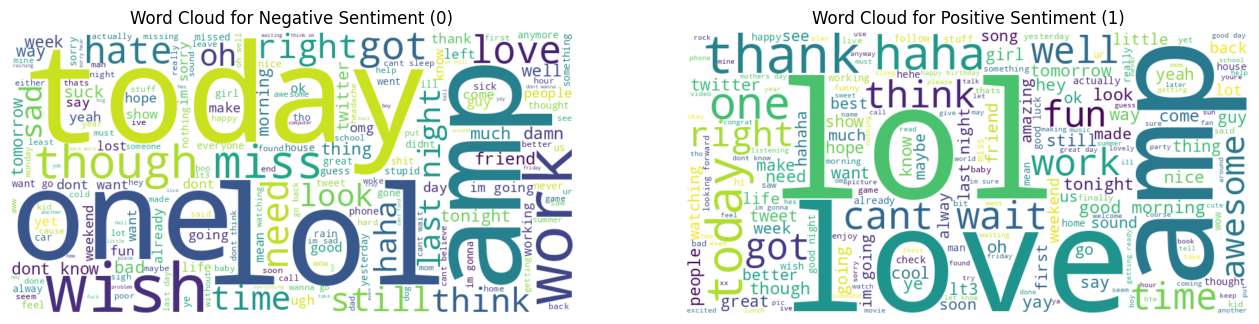

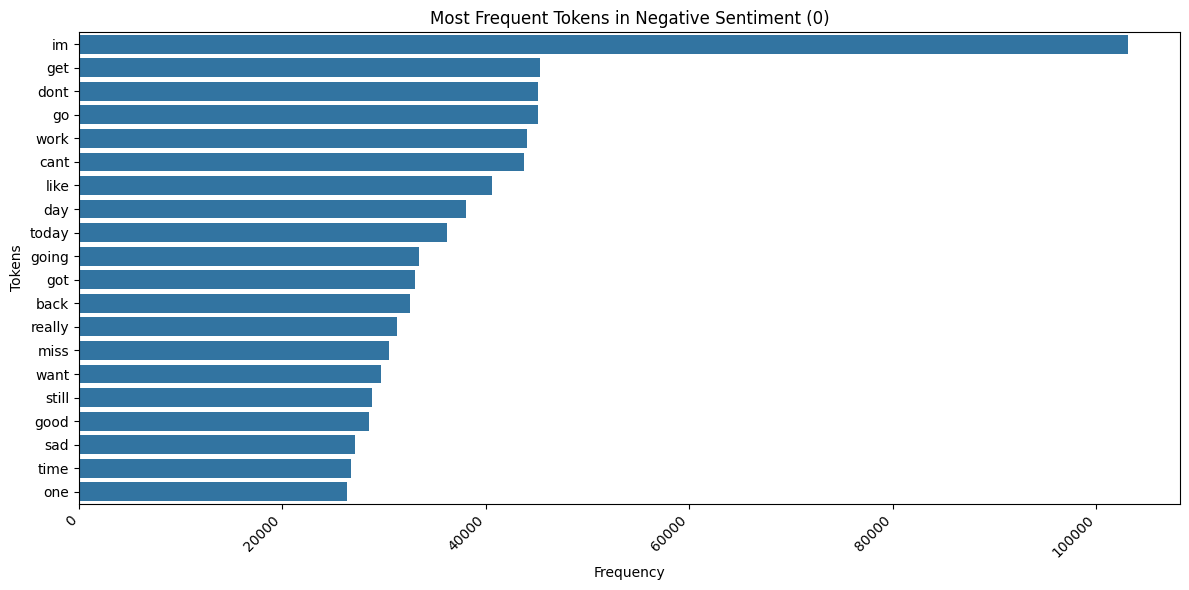

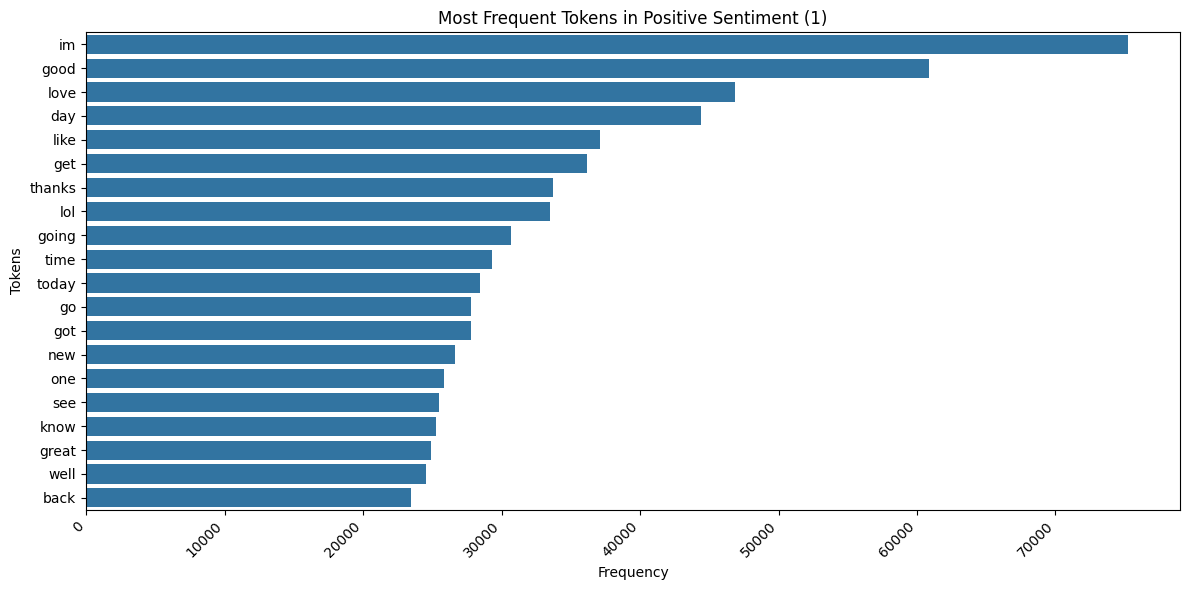

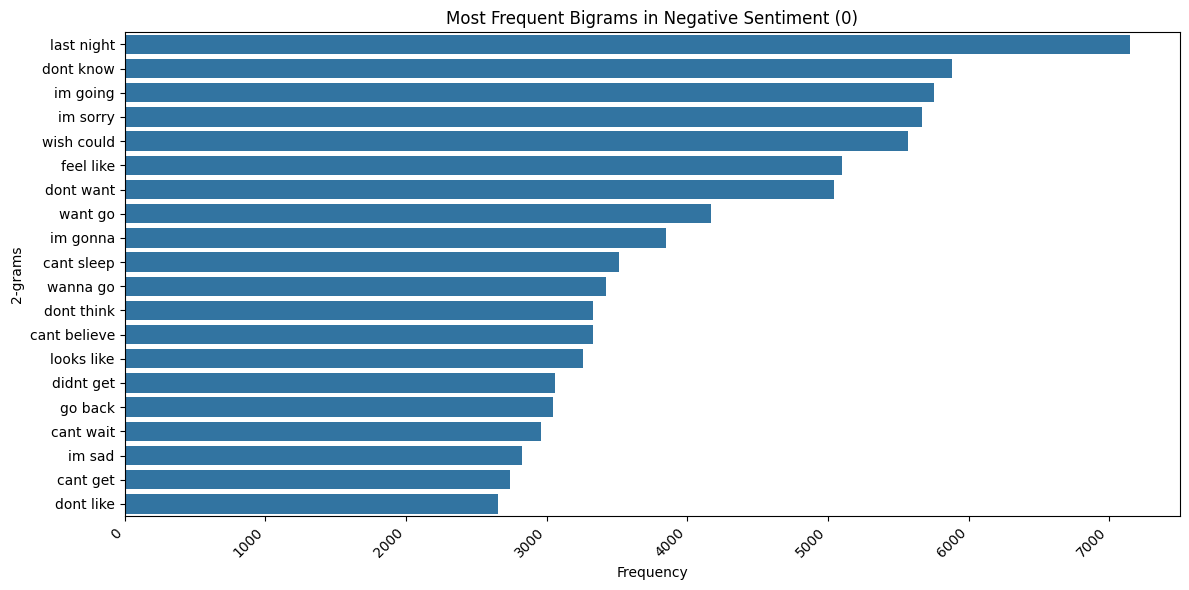

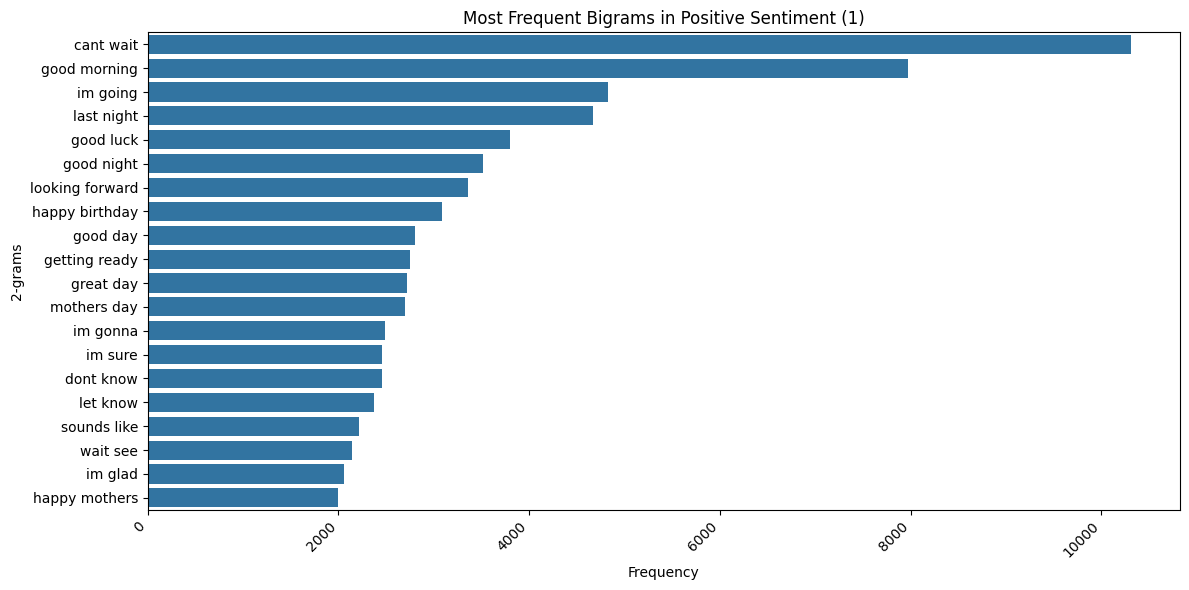

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Separate text based on sentiment
negative_tokens = [token for tokens_list in df[df['target'] == 0]['tokens'].dropna() for token in tokens_list]
positive_tokens = [token for tokens_list in df[df['target'] == 1]['tokens'].dropna() for token in tokens_list]

# --- Word Clouds ---
# Generate word clouds from tokens
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_tokens))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_tokens))

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment (0)')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment (1)')

plt.show()

# --- Token Counts (Unigrams) ---
# Function to plot most common tokens
def plot_most_common_tokens(tokens, title, n=20):
    token_counts = Counter(tokens)
    most_common = token_counts.most_common(n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(12, 6))
    sns.barplot(y=list(words), x=list(counts))
    plt.title(title)
    plt.ylabel("Tokens")
    plt.xlabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot most common tokens for negative sentiment
plot_most_common_tokens(negative_tokens, 'Most Frequent Tokens in Negative Sentiment (0)')

# Plot most common tokens for positive sentiment
plot_most_common_tokens(positive_tokens, 'Most Frequent Tokens in Positive Sentiment (1)')

# --- Bigram Counts ---
# Function to get and plot most common n-grams
def plot_most_common_ngrams(text_series, title, n=2, num_ngrams=20):
    # Join tokens back into strings for vectorizer
    text_strings = text_series.apply(lambda x: " ".join(x)).dropna()

    if len(text_strings) == 0:
        print(f"No text available for {title}")
        return

    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(text_strings)
    ngram_counts = ngram_matrix.sum(axis=0)
    ngram_freq = [(ngram, count) for ngram, count in zip(vectorizer.get_feature_names_out(), ngram_counts.tolist()[0])]

    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    most_common_ngrams = ngram_freq[:num_ngrams]

    ngrams, counts = zip(*most_common_ngrams)

    plt.figure(figsize=(12, 6))
    sns.barplot(y=list(ngrams), x=list(counts))
    plt.title(title)
    plt.ylabel(f"{n}-grams")
    plt.xlabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot most common bigrams for negative sentiment
plot_most_common_ngrams(df[df['target'] == 0]['tokens'], 'Most Frequent Bigrams in Negative Sentiment (0)', n=2)

# Plot most common bigrams for positive sentiment
plot_most_common_ngrams(df[df['target'] == 1]['tokens'], 'Most Frequent Bigrams in Positive Sentiment (1)', n=2)


Descriptive Statistics for Text Length and Word Count by Target:
       text_length                                                       \
             count       mean        std  min   25%   50%    75%    max   
target                                                                    
0         800000.0  74.272070  36.715609  6.0  44.0  69.0  104.0  188.0   
1         800000.0  73.811471  36.055962  6.0  44.0  69.0  103.0  359.0   

       word_count                                                   
            count       mean       std  min  25%   50%   75%   max  
target                                                              
0        800000.0  13.581568  7.073294  1.0  8.0  13.0  19.0  57.0  
1        800000.0  12.769440  6.815892  1.0  7.0  12.0  18.0  64.0  


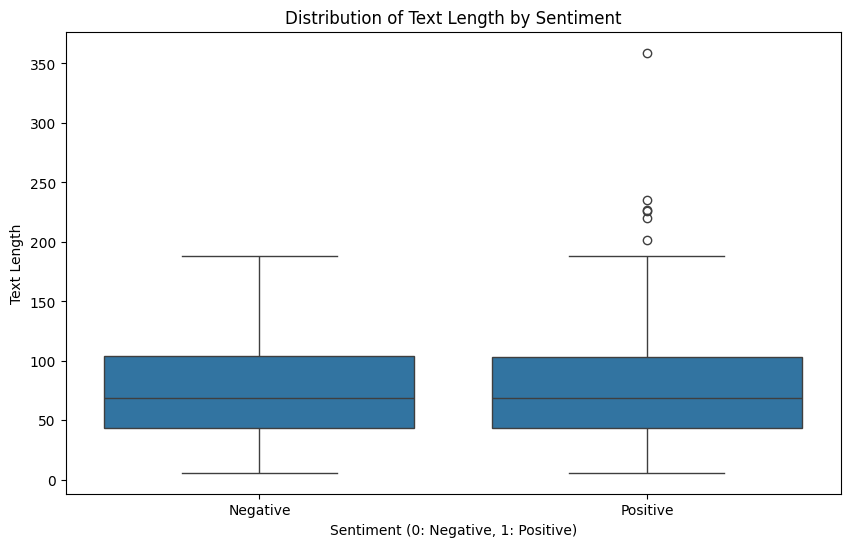

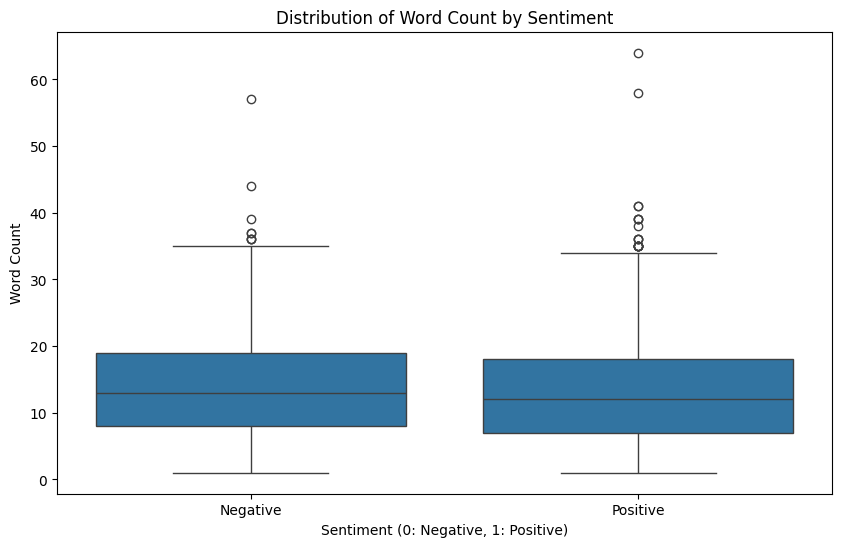

In [11]:
# Calculate length and number of words
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Display descriptive statistics for length and word count by target
print("\nDescriptive Statistics for Text Length and Word Count by Target:")
print(df.groupby('target')[['text_length', 'word_count']].describe())

# Boxplot for text length by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Distribution of Text Length by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Text Length')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Boxplot for word count by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='word_count', data=df)
plt.title('Distribution of Word Count by Sentiment')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Word Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [12]:
# Take a sample of 10000 tweets for each target
df_negative = df[df['target'] == 0].sample(n=10000, random_state=42)
df_positive = df[df['target'] == 1].sample(n=10000, random_state=42)

# Concatenate the samples
df_sample = pd.concat([df_negative, df_positive]).reset_index(drop=True)

# Shuffle the sample DataFrame
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows and the distribution of the target in the sample
display(df_sample.head())
print("\nDistribution of Sentiment in the Sample:")
print(df_sample['target'].value_counts())

,target,ids,date,user,text,year,month,day,hour,weekday,tokens,text_length,word_count
0,1,1965564508,2009-05-29 16:08:36,JuneBug143,@DawnRichard THANKS LUV...KEEP THE GRIND GOING...,2009,5,29,16,4,"[dawnrichard, thanks, luvkeep, grind, going, l...",131,22
1,0,2055900837,2009-06-06 10:09:39,estrellaxstarr,I feel like watching The Life Aquatic. But I d...,2009,6,6,10,5,"[feel, like, watching, life, aquatic, dont]",58,12
2,0,2259913449,2009-06-20 18:22:04,andyandyahh,So aparentally early this morning Erol died of...,2009,6,20,18,5,"[aparentally, early, morning, erol, died, hear...",93,17
3,0,1694267795,2009-05-04 01:50:41,Jeefle,"Chopchop, get dressed! Getting ready for work",2009,5,4,1,0,"[chopchop, get, dressed, getting, ready, work]",46,7
4,1,1573648656,2009-04-21 02:10:27,AussieGal999,@misshaleymae You know it baby ! x,2009,4,21,2,1,"[misshaleymae, know, baby]",35,7



Distribution of Sentiment in the Sample:
target
1    10000
0    10000
Name: count, dtype: int64


For elements that contribute to the style or emphasis within the text (capital letters, exclamations, interrogations, and ellipsis), ratios are generally more informative as they account for tweet length.

For elements that represent distinct entities or actions (emojis, hashtags, mentions, and URLs), simple counts are often more appropriate as they reflect the number of instances of these specific items.

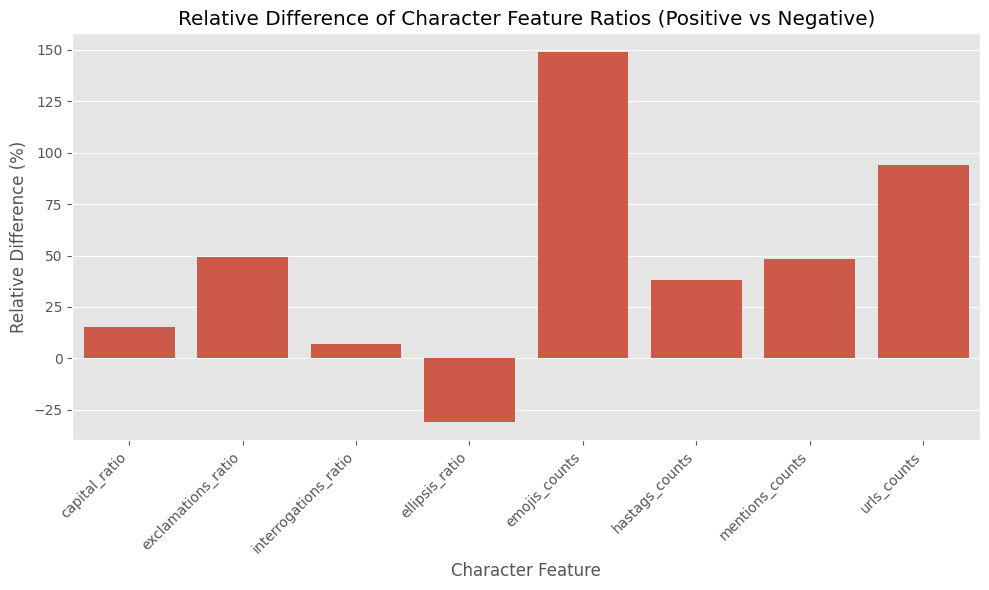

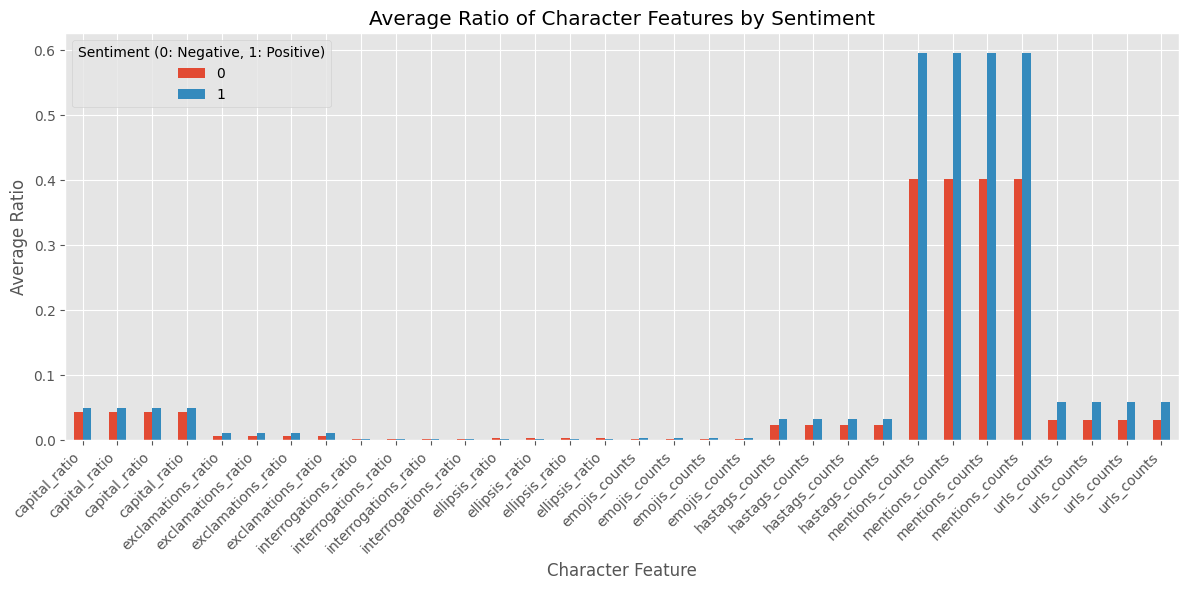

In [17]:
# Feature Engineering: Character Analysis
def char_analysis(text):
    if isinstance(text, str):
        capital_letters = sum(1 for char in text if char.isupper())
        exclamations = text.count('!')
        interrogations = text.count('?')
        ellipsis_count = text.count('...')
        emojis = len(re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U00002702-\U000027B0\U00002600-\U000026FF]', text)) # Basic emoji regex
        # Regex for positive emojis (some examples)
        positive_emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U00002705\U00002728]+')
        # Regex for negative emojis (some examples)
        negative_emoji_pattern = re.compile(r'[\U0001F611\U0001F620-\U0001F637\U0001F44E\U0001F621]+')
        hastags_count = text.count('#')
        mentions_count = text.count('@')
        urls_count = text.count('http')

        total_chars = len(text)
        if total_chars > 0:
            return pd.Series({
                'capital_ratio': capital_letters / total_chars,
                'exclamations_ratio': exclamations / total_chars,
                'interrogations_ratio': interrogations / total_chars,
                'ellipsis_ratio': ellipsis_count / total_chars,
                'emojis_counts': emojis,
                'hastags_counts': hastags_count,
                'mentions_counts': mentions_count,
                'urls_counts': urls_count,
            })
        else:
            return pd.Series({
                'capital_ratio': 0,
                'exclamations_ratio': 0,
                'interrogations_ratio': 0,
                'ellipsis_ratio': 0,
                'emojis_counts': 0,
                'hastags_counts': 0,
                'mentions_counts': 0,
                'urls_counts': 0,
            })
    else:
        return pd.Series({
            'capital_ratio': 0,
            'exclamations_ratio': 0,
            'interrogations_ratio': 0,
            'ellipsis_ratio': 0,
            'emojis_counts': 0,
            'hastags_counts': 0,
            'mentions_counts': 0,
            'urls_counts': 0,
        })

df_char_analysis = df['text'].apply(char_analysis)
df = pd.concat([df, df_char_analysis], axis=1)

# Group by target and calculate the mean ratio for each feature
char_analysis_by_target = df.groupby('target')[['capital_ratio', 'exclamations_ratio', 'interrogations_ratio', 'ellipsis_ratio', 'emojis_counts','hastags_counts', 'mentions_counts', 'urls_counts']].mean()

# Calculate the relative difference
# (Positive - Negative) / Negative * 100, or simply (Positive - Negative) if Negative is 0
relative_diff = {}
for col in char_analysis_by_target.columns:
    neg_val = char_analysis_by_target.loc[0, col].iloc[0] # Use .iloc[0] to get the scalar value
    pos_val = char_analysis_by_target.loc[1, col].iloc[0] # Use .iloc[0] to get the scalar value

    if neg_val > 0:
        relative_diff[col] = ((pos_val - neg_val) / neg_val) * 100
    else:
        # Handle cases where the negative sentiment has 0 occurrences of the feature
        relative_diff[col] = (pos_val - neg_val) * 100 # Represent the absolute difference multiplied by 100

relative_diff_series = pd.Series(relative_diff)

# Plotting the relative difference
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_diff_series.index, y=relative_diff_series.values)
plt.title('Relative Difference of Character Feature Ratios (Positive vs Negative)')
plt.xlabel('Character Feature')
plt.ylabel('Relative Difference (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Barplot showing the ratio for each target value
char_analysis_by_target_T = char_analysis_by_target.T # Transpose for easier plotting

char_analysis_by_target_T.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Ratio of Character Features by Sentiment')
plt.xlabel('Character Feature')
plt.ylabel('Average Ratio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment (0: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

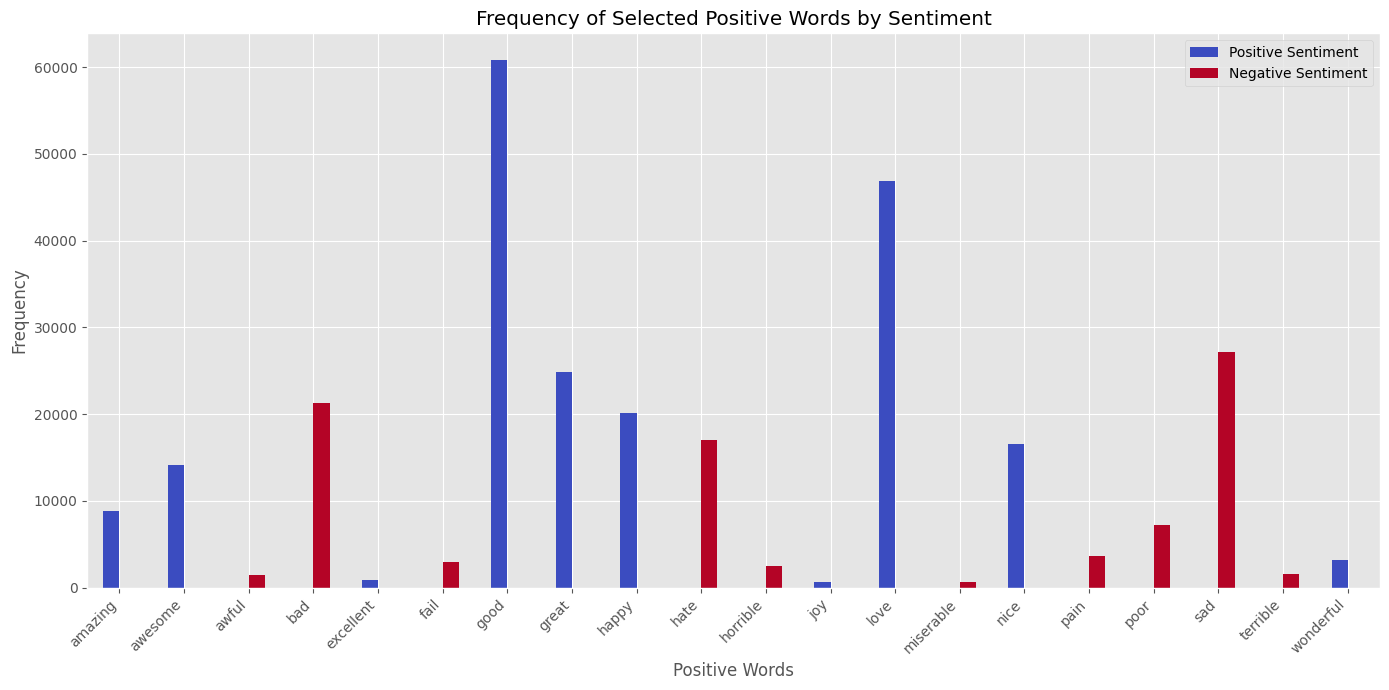

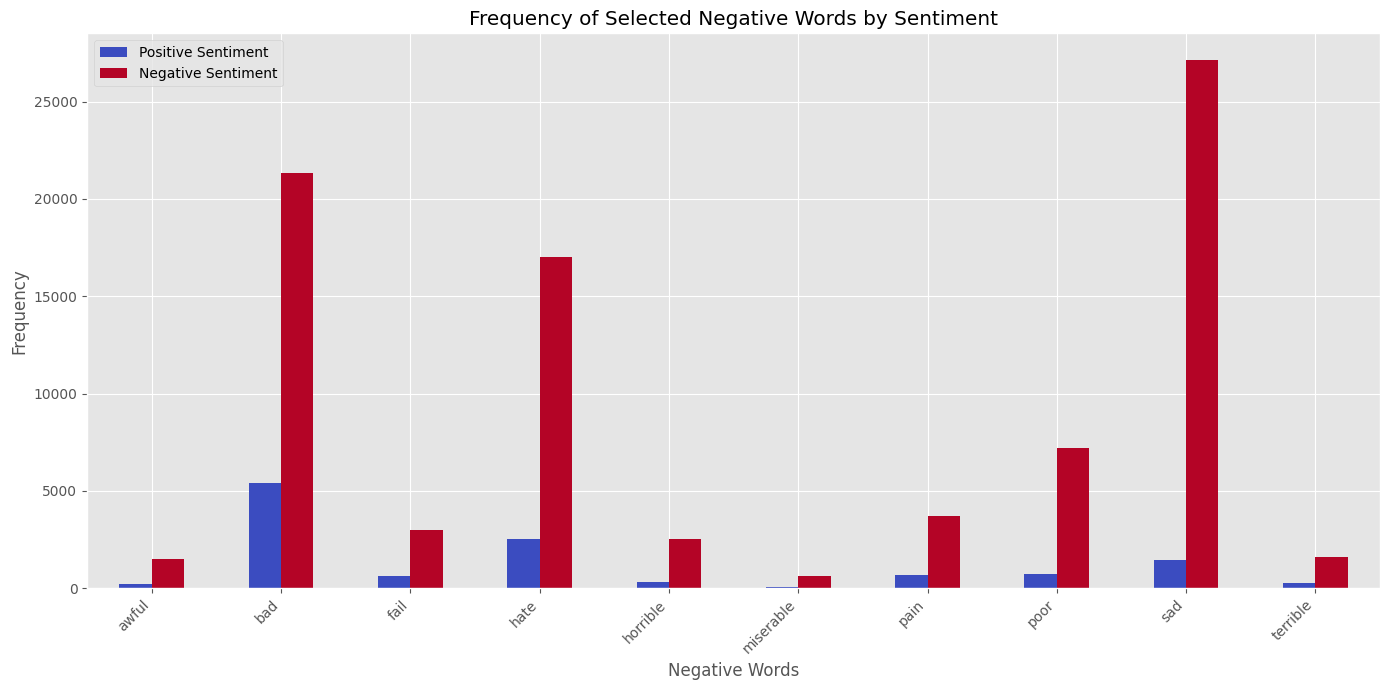

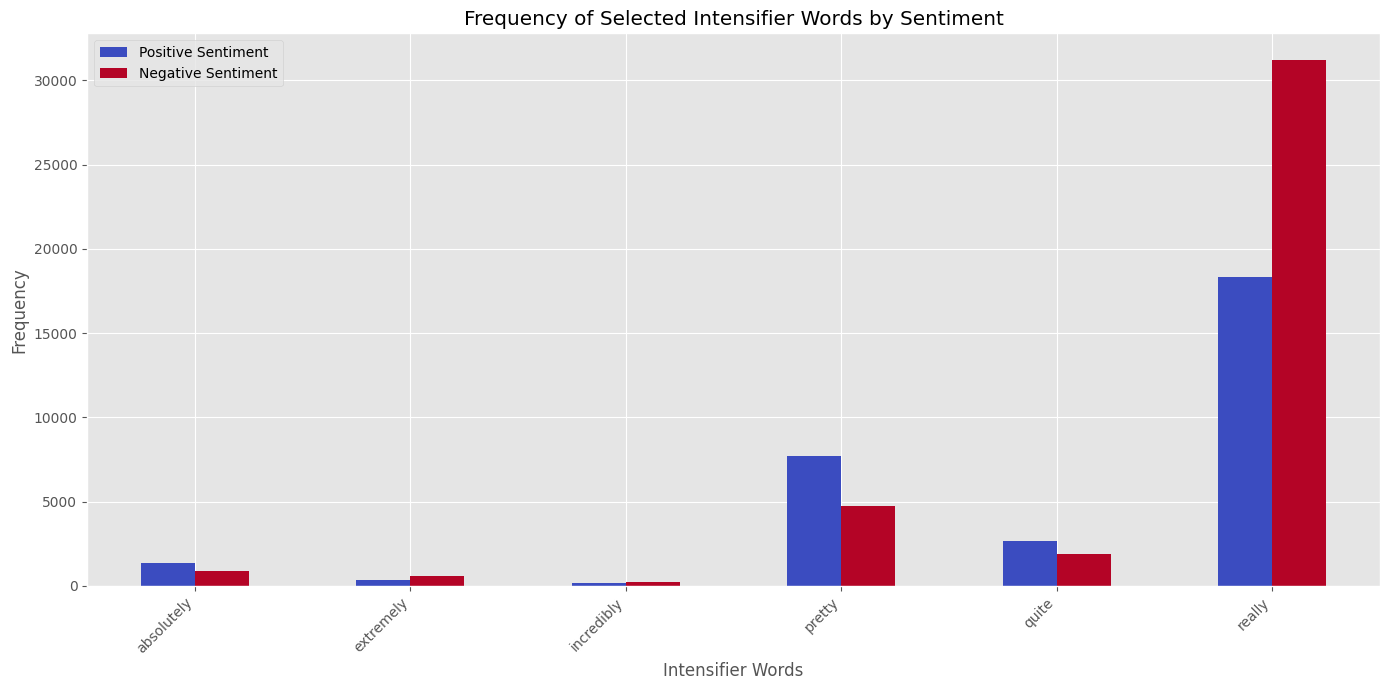

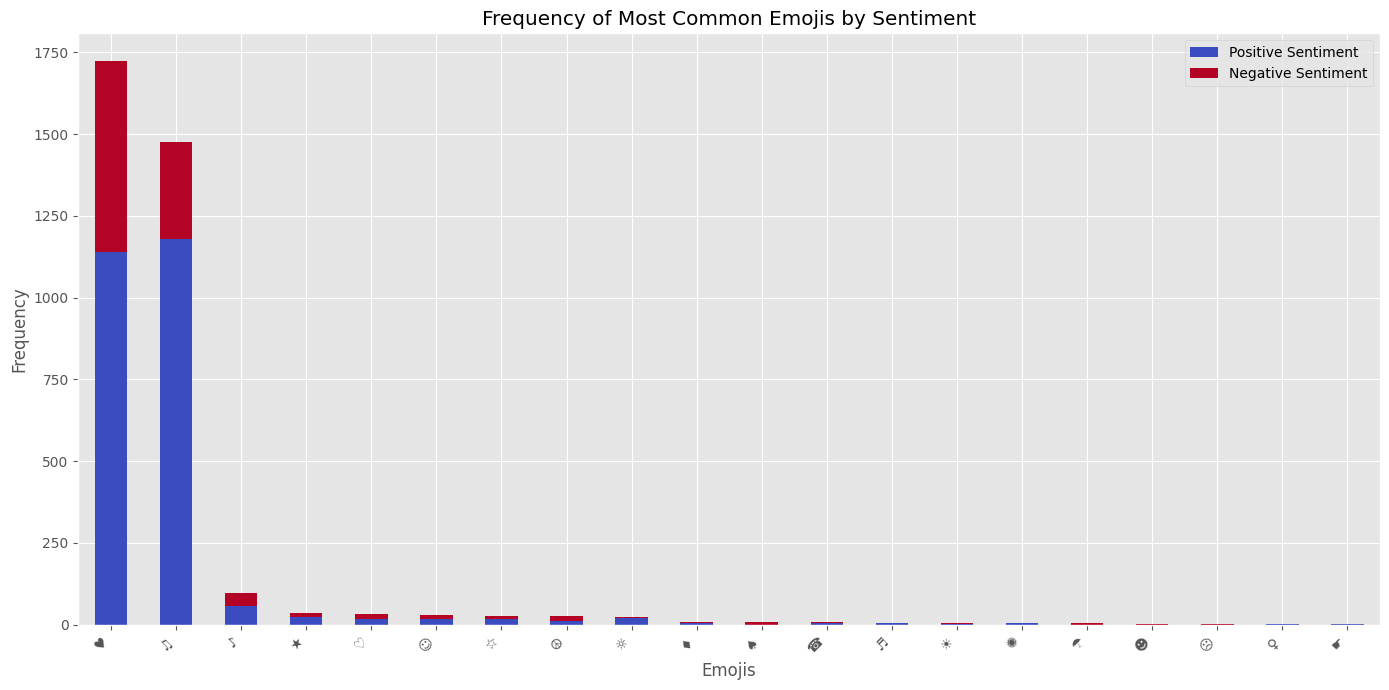

In [18]:
from collections import Counter

# Define lists of positive, negative, and intensifier words
positive_words = ['good', 'great', 'love', 'happy', 'awesome', 'nice', 'wonderful', 'excellent', 'amazing', 'joy']
negative_words = ['bad', 'terrible', 'hate', 'sad', 'awful', 'poor', 'horrible', 'miserable', 'pain', 'fail']
intensifiers = ['very', 'really', 'so', 'extremely', 'incredibly', 'quite', 'pretty', 'absolutely']

# Compile regex for emojis (more specific regex might be needed for comprehensive coverage)
# Basic regex for common emojis and some common emoji characters
emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U00002702-\U000027B0\U00002600-\U000026FF\U0000FE00-\U0000FE0F\U0001F1E0-\U0001F1FF]')

# Function to count specific tokens in a list of tokens
def count_specific_tokens(tokens_list, word_list):
    token_counts = Counter([token for tokens in tokens_list for token in tokens if token in word_list])
    return token_counts

# Function to count emojis in raw text
def count_emojis_in_text(text_series):
    all_emojis = []
    for text in text_series.dropna():
        all_emojis.extend(emoji_pattern.findall(text))
    return Counter(all_emojis)


# Count positive, negative, and intensifier words in positive and negative tweets
positive_word_counts_pos = count_specific_tokens(df[df['target'] == 1]['tokens'], positive_words)
negative_word_counts_pos = count_specific_tokens(df[df['target'] == 1]['tokens'], negative_words)
intensifier_counts_pos = count_specific_tokens(df[df['target'] == 1]['tokens'], intensifiers)

positive_word_counts_neg = count_specific_tokens(df[df['target'] == 0]['tokens'], positive_words)
negative_word_counts_neg = count_specific_tokens(df[df['target'] == 0]['tokens'], negative_words)
intensifier_counts_neg = count_specific_tokens(df[df['target'] == 0]['tokens'], intensifiers)

# Count emojis in positive and negative tweets (using raw text)
emoji_counts_pos = count_emojis_in_text(df[df['target'] == 1]['text'])
emoji_counts_neg = count_emojis_in_text(df[df['target'] == 0]['text'])

# --- Visualization ---

# Function to plot token counts
def plot_token_counts(pos_counts, neg_counts, title, token_type):
    # Combine counts and create a DataFrame for easier plotting
    all_tokens = set(pos_counts.keys()).union(set(neg_counts.keys()))
    data = {token: [pos_counts.get(token, 0), neg_counts.get(token, 0)] for token in all_tokens}
    plot_df = pd.DataFrame.from_dict(data, orient='index', columns=['Positive Sentiment', 'Negative Sentiment'])
    plot_df = plot_df.sort_index() # Sort alphabetically for consistency

    if plot_df.empty:
        print(f"No {token_type} found.")
        return

    plot_df.plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
    plt.title(title)
    plt.xlabel(token_type)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot positive word counts
plot_token_counts(positive_word_counts_pos, negative_word_counts_neg, 'Frequency of Selected Positive Words by Sentiment', 'Positive Words')

# Plot negative word counts
plot_token_counts(negative_word_counts_pos, negative_word_counts_neg, 'Frequency of Selected Negative Words by Sentiment', 'Negative Words')

# Plot intensifier counts
plot_token_counts(intensifier_counts_pos, intensifier_counts_neg, 'Frequency of Selected Intensifier Words by Sentiment', 'Intensifier Words')

# Plot emoji counts (plot the top N most frequent emojis in total)
def plot_emoji_counts(pos_counts, neg_counts, title, num_emojis=20):
    all_emoji_counts = Counter(pos_counts) + Counter(neg_counts)
    most_common_emojis = all_emoji_counts.most_common(num_emojis)

    if not most_common_emojis:
        print("No emojis found.")
        return

    emojis, total_counts = zip(*most_common_emojis)

    # Prepare data for stacked bar chart
    emoji_data = {emoji: [pos_counts.get(emoji, 0), neg_counts.get(emoji, 0)] for emoji in emojis}
    plot_df = pd.DataFrame.from_dict(emoji_data, orient='index', columns=['Positive Sentiment', 'Negative Sentiment'])

    plot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm')
    plt.title(title)
    plt.xlabel('Emojis')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_emoji_counts(emoji_counts_pos, emoji_counts_neg, 'Frequency of Most Common Emojis by Sentiment')

# Users analysis

In [10]:
print(f'Number of unique users: {df["user"].nunique()}')
user_tweet_counts = df['user'].value_counts()

# Sort the counts in descending order and get the ranking
user_tweet_ranking = user_tweet_counts.sort_values(ascending=False)

# Display the top 10 users with the most tweets
print("Ranking of users by number of tweets (top 10):")
print(user_tweet_ranking.head(10))

Number of unique users: 659775
Ranking of users by number of tweets (top 10):
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


In [11]:
user_tweet_counts.describe()

,count
count,659775.000000
mean,2.425069
std,4.710913
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,549.000000


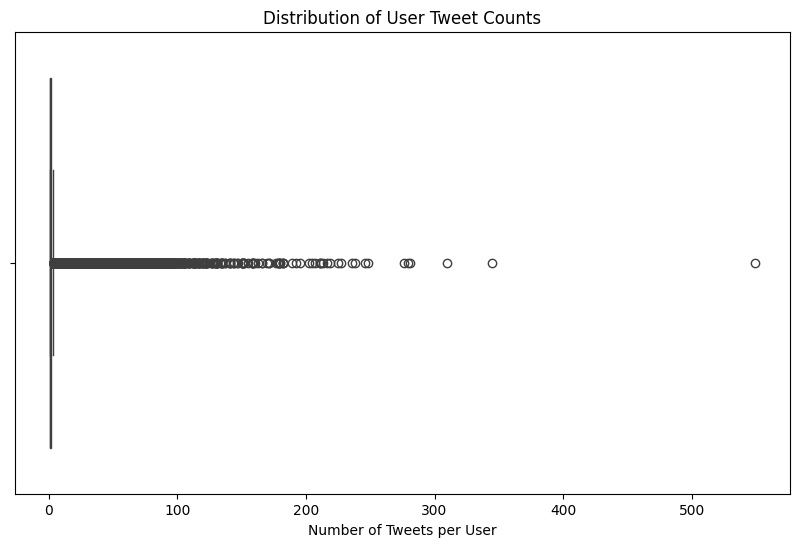

In [18]:
# Plot a box plot of user tweet counts to visualize the distribution
def plot_user_tweet_counts(counts=user_tweet_counts):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=counts)
  plt.title('Distribution of User Tweet Counts')
  plt.xlabel('Number of Tweets per User')
  plt.show()

plot_user_tweet_counts()


No duplicate tweets found for users with more than 200 tweets based on user and text.
Boxplot after cleaning:


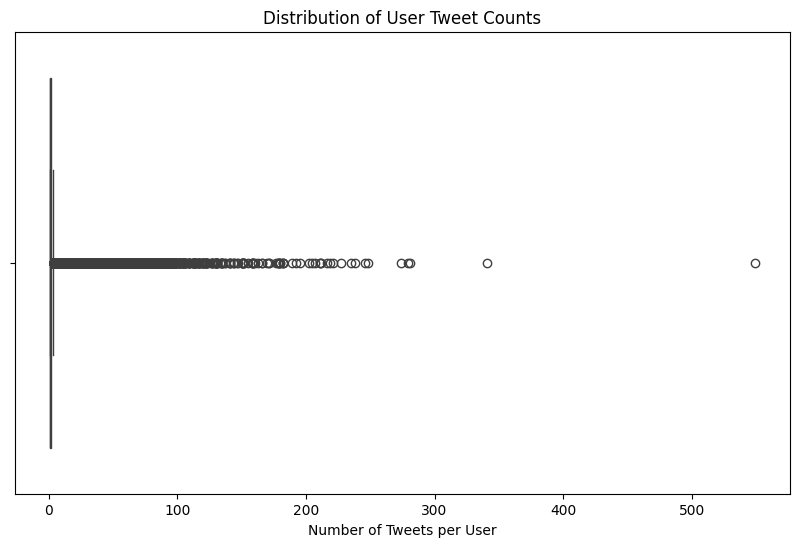

In [19]:
# Identify users with more than 200 tweets
users_with_many_tweets = user_tweet_counts[user_tweet_counts > 200].index

# Filter the dataframe to include only tweets from these users
df_many_tweets = df[df['user'].isin(users_with_many_tweets)].copy()

# Check for duplicates based on 'user' and 'text'
duplicates = df_many_tweets[df_many_tweets.duplicated(subset=['user', 'text'], keep=False)]

if not duplicates.empty:
    print(f"\nFound {len(duplicates)} duplicate tweets for users with more than 200 tweets based on user and text.")

    # Group by 'user' and 'text' and check if 'target' is the same or different within each group
    duplicate_groups = duplicates.groupby(['user', 'text'])
    duplicates_same_target = []
    duplicates_diff_target = []

    for name, group in duplicate_groups:
        if group['target'].nunique() == 1:
            duplicates_same_target.append(group)
        else:
            duplicates_diff_target.append(group)

    if duplicates_same_target:
        print(f"\nFound {len(duplicates_same_target)} duplicate groups with the same target.")
        # Concatenate the groups to form a DataFrame
        duplicates_same_target_df = pd.concat(duplicates_same_target)

        # Keep the first occurrence for duplicates with the same target
        df_many_tweets_cleaned = df_many_tweets.drop_duplicates(subset=['user', 'text', 'target'], keep='first')
        print(f"Removed {len(duplicates_same_target_df) - len(duplicates_same_target_df.drop_duplicates(subset=['user', 'text', 'target'], keep='first'))} duplicate tweets with the same target.")

        # Reintegrate the cleaned subset back into the original dataframe
        # First, remove the original rows for users with many tweets
        df_cleaned = df[~df['user'].isin(users_with_many_tweets)].copy()
        # Then, add the cleaned rows for users with many tweets
        df_cleaned = pd.concat([df_cleaned, df_many_tweets_cleaned], ignore_index=True)
        print(f"Original dataframe shape: {df.shape}")
        print(f"Cleaned dataframe shape: {df_cleaned.shape}")
        df = df_cleaned # Update the main dataframe

    if duplicates_diff_target:
        print(f"\nFound {len(duplicates_diff_target)} duplicate groups with different targets:")
        for i, group in enumerate(duplicates_diff_target):
            print(f"\nGroup {i+1}:")
            display(group[['user', 'text', 'target']])
        print("\nDuplicates with different targets are kept for further inspection.")
else:
    print("\nNo duplicate tweets found for users with more than 200 tweets based on user and text.")

print("Boxplot after cleaning:")
plot_user_tweet_counts(df['user'].value_counts())

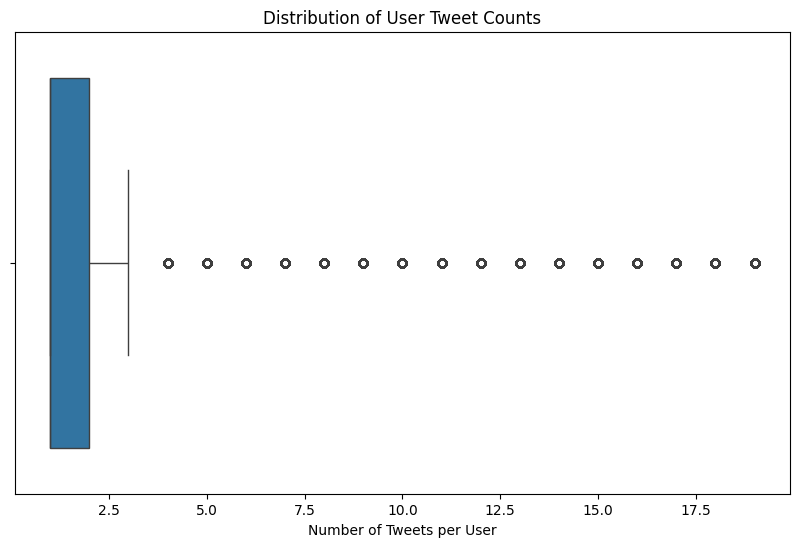

In [22]:
# Calculate tweet counts for users with fewer tweets to analyze most common behaviours
users_with_few_tweets = user_tweet_counts[user_tweet_counts < 20].index
tweet_counts_few_users = user_tweet_counts[users_with_few_tweets]

# Plot a box plot for users with less than 200 tweets
plot_user_tweet_counts(tweet_counts_few_users)

In [24]:
# Filter for users with more than 3 tweets
users_with_enough_tweets = df['user'].value_counts()
users_with_enough_tweets = users_with_enough_tweets[users_with_enough_tweets > 3].index
df_filtered_users = df[df['user'].isin(users_with_enough_tweets)].copy()

# Calculate sentiment counts per user
user_sentiment_counts = df_filtered_users.groupby(['user', 'target']).size().unstack(fill_value=0)

# Calculate total tweets per user
user_sentiment_counts['total_tweets'] = user_sentiment_counts[0] + user_sentiment_counts[1]

# Calculate proportion of positive and negative tweets
user_sentiment_counts['positive_proportion'] = (user_sentiment_counts[1] / user_sentiment_counts['total_tweets']) * 100
user_sentiment_counts['negative_proportion'] = (user_sentiment_counts[0] / user_sentiment_counts['total_tweets']) * 100

# Rank users by positive proportion (descending) and negative proportion (descending)
most_positive_users = user_sentiment_counts.sort_values(by='positive_proportion', ascending=False)
most_negative_users = user_sentiment_counts.sort_values(by='negative_proportion', ascending=False)

# Display the top 10 most positive users
print("Top 10 Most Positive Users (with > 3 tweets):")
print(most_positive_users[['positive_proportion', 'total_tweets']].head(10).round(2))

print("\n")

# Display the top 10 most negative users
print("Top 10 Most Negative Users (with > 3 tweets):")
print(most_negative_users[['negative_proportion', 'total_tweets']].head(10).round(2))

Top 10 Most Positive Users (with > 3 tweets):
target         positive_proportion  total_tweets
user                                            
zunaid                       100.0             5
007wisdom                    100.0             6
zyrafa                       100.0             5
zxcherie                     100.0             4
zx10r07                      100.0             5
munirusman                   100.0             4
munkeat                      100.0             8
munkii_rulz                  100.0             5
JoeMiechowicz                100.0            14
JocelynHWOOD                 100.0             5


Top 10 Most Negative Users (with > 3 tweets):
target           negative_proportion  total_tweets
user                                              
06Linzi11                      100.0             4
09Mimi                         100.0             4
zuckerschnute78                100.0             4
zubi97                         100.0             4
zubbyzebra  

# Save dataframe as a pickle file

In [ ]:
import pickle

# Define the path to save the pickle file
pickle_path = '/content/drive/MyDrive/OC/Projets/P7/data/processed_tweets_df.pkl'

# Save the DataFrame as a pickle file
with open(pickle_path, 'wb') as f:
    pickle.dump(df, f)

print(f"DataFrame saved to {pickle_path}")

DataFrame saved to /content/drive/MyDrive/OC/Projets/P7/data/processed_tweets_df.pkl
